In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv(r'D:\Datasets\world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### We don't need all of the columns so we filter out only the columns we require


In [4]:
data_col = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Healthy life expectancy','Social support','Freedom to make life choices', 'Generosity','Perceptions of corruption']

In [5]:
data = data[data_col].copy()

In [6]:
df = data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'hap_score','Logged GDP per capita':'GDP','Healthy life expectancy':'life_expectancy','Social support':'social_support','Freedom to make life choices':'freedom','Perceptions of corruption':'Perceptions_of_corruption'},axis=1)
df.head()

,country_name,regional_indicator,hap_score,GDP,life_expectancy,social_support,freedom,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,72.0,0.954,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,72.7,0.954,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,74.4,0.942,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,73.0,0.983,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,72.4,0.942,0.913,0.175,0.338


### Columns Filtered Successfully!But What if it has Null Values...Lets check it..


In [7]:
df.isna().sum()

country_name                 0
regional_indicator           0
hap_score                    0
GDP                          0
life_expectancy              0
social_support               0
freedom                      0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64

### No Null Values Present ... Hurrahhhh!!


## Lets see the relation between Happiness Score and GDP per Capita

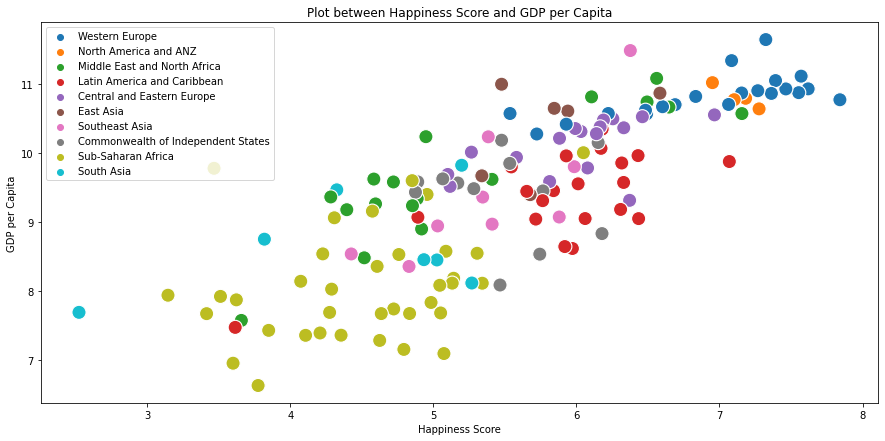

In [8]:
plt.rcParams['figure.figsize']=(15,7)
plt.title("Plot between Happiness Score and GDP per Capita")
sbn.scatterplot(x=df['hap_score'],y=df['GDP'],hue=df['regional_indicator'],s=200)
plt.legend(loc="upper left",fontsize="10")
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.show()

1 - Good the GDP per Capita the good the Happiness Score will be!

2 - Here we can observe that Western European Countries,North America&ANZ,Central European Countries have comparatively high GDP per Capita Resulting in Good Happiness Score.

3 - The countries from Sub-Saharan regions have lower GDP per Capita resulting in lower Happiness Score

## Let's See which region on the globe contribute the most to the total world's GDP

In [9]:
gdp_reg = df.groupby('regional_indicator')['GDP'].sum()
gdp_reg

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: GDP, dtype: float64

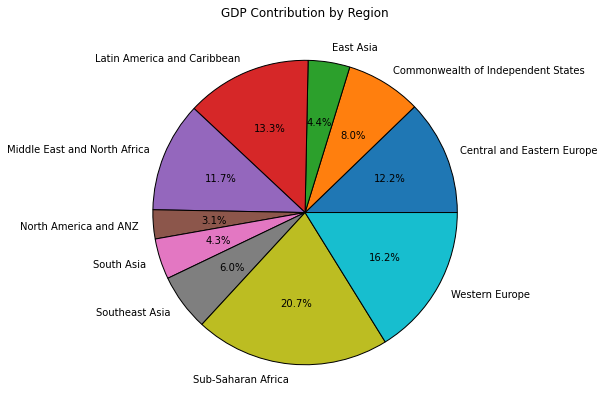

In [10]:
gdp_reg.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('GDP Contribution by Region')
plt.ylabel('')
plt.show()

#### What a surprise .. Sub-Saharan African region contributes largest to the worlds GDP per Capita followed by Western Europe and Central&Eastern Europe

In [11]:
total_countries = df.groupby('regional_indicator')['country_name'].count()
total_countries

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

#### So heres a reason...Sub Saharan Region consists of almost 36 countries out of 196 countries out there so it is not a surprise why it is contributing more.Right?

## Lets See which factor of the report impacts other factor!

<AxesSubplot:>

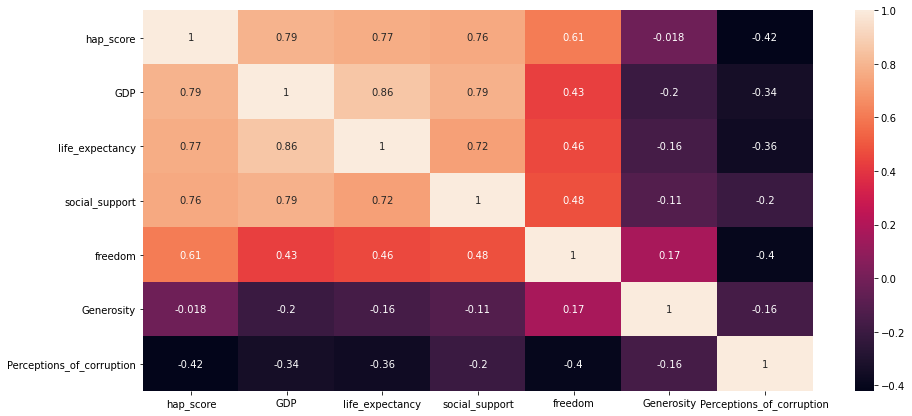

In [12]:
df_cor = sbn.heatmap(df.corr(),annot=True,linecolor='black')
df_cor

1 - As with the increase in GDP per Capita and more Freedom given to take decision and with Social Support the happiness score increases thus leading to higher Life Expectancy!

2 - With more Corruption occuring GDP per Capita growth is hindered thus causing little to no development leading to low Happiness Score!

## Corruption in regions

In [13]:
corruption = df.groupby('regional_indicator')['Perceptions_of_corruption'].mean()
corruption

regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: Perceptions_of_corruption, dtype: float64

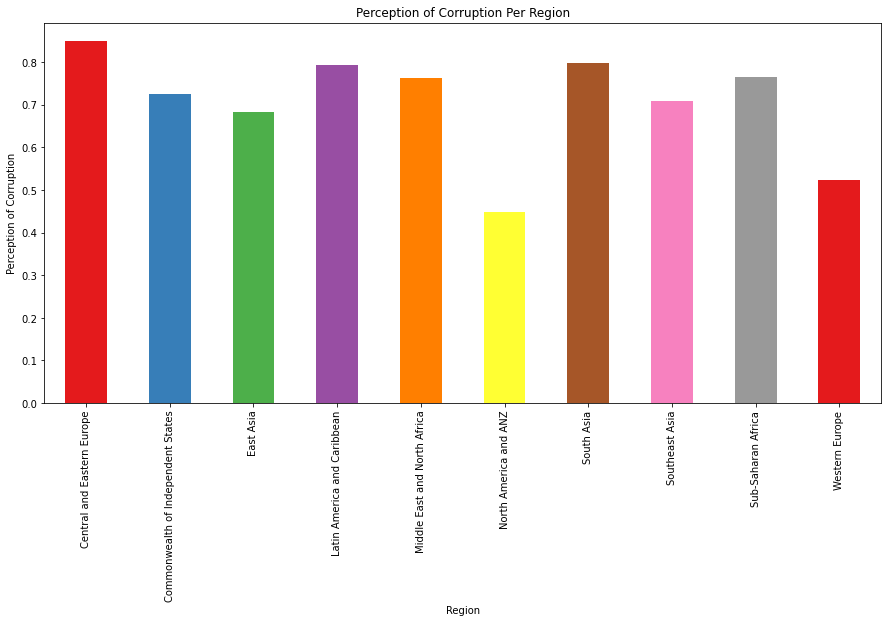

In [14]:
corruption.plot.bar(color=sbn.color_palette('Set1'))
plt.xlabel('Region')
plt.ylabel('Perception of Corruption')
plt.title('Perception of Corruption Per Region')
plt.show()

#### Here we can observe the countries from Central Europe are most corrupted thus making Central Europe most Corrupted region out there followed by South Asian and Latin American Region

#### North America&ANZ have low amount of Corruption followed by Western Europe

## Regions by happiness

In [15]:
hap_reg = df.groupby('regional_indicator')['hap_score'].median()
hap_reg

regional_indicator
Central and Eastern Europe            6.0780
Commonwealth of Independent States    5.4715
East Asia                             5.7610
Latin America and Caribbean           5.9920
Middle East and North Africa          4.8870
North America and ANZ                 7.1430
South Asia                            4.9340
Southeast Asia                        5.3840
Sub-Saharan Africa                    4.6160
Western Europe                        7.0850
Name: hap_score, dtype: float64

#### We can say Western Europe and North America&ANZ are most happiest parts in the world.While Middle East , Overall African Region are not to be considered happiest parts out there.

## Life expectancy in top 10 happiest countries

In [16]:
hap_df = df.head(10)

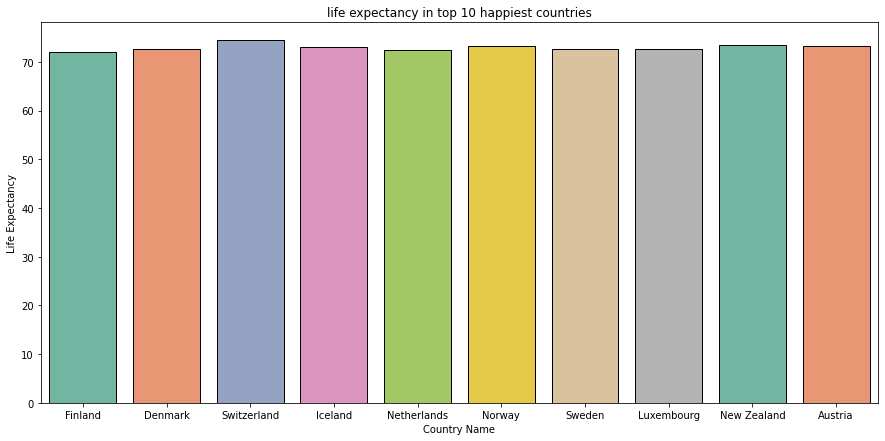

In [17]:
xlabel = hap_df.country_name
sbn.barplot(x=hap_df['country_name'],y=hap_df['life_expectancy'],palette=('Set2'),edgecolor='black')
plt.xlabel('Country Name')
plt.ylabel('Life Expectancy')
plt.title('life expectancy in top 10 happiest countries')
plt.show()

#### Happiness is the key to live a good and long life.The people in the Western Europe have good facilites and there is also development and they also have privelege to make life life decisions and they also receive social support making them one of most priveleged people on the Earth thus leading to Good  and Long Life!

## Life Expectancy in bottom 10 least happiest countries

In [18]:
unhap_df = df.tail(10)

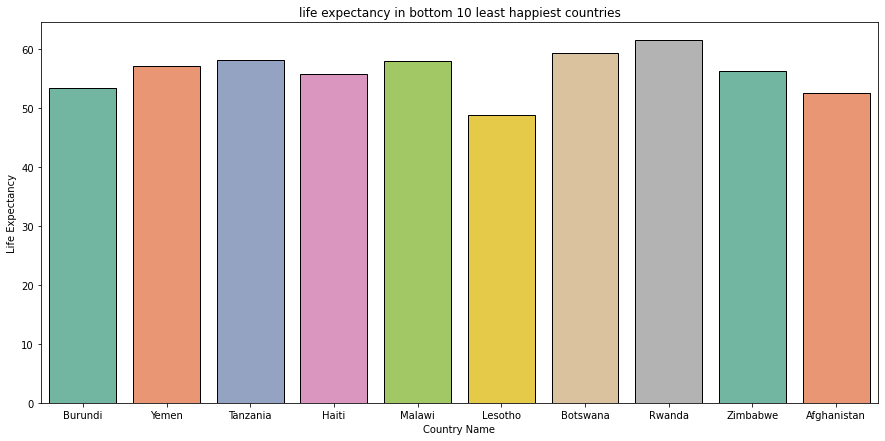

In [19]:
xlabel = unhap_df.country_name
sbn.barplot(x=unhap_df['country_name'],y=unhap_df['life_expectancy'],palette=('Set2'),edgecolor='black')
plt.xlabel('Country Name')
plt.ylabel('Life Expectancy')
plt.title('life expectancy in bottom 10 least happiest countries')
plt.show()

#### The countries in African region don't have the resources and priveleges of the outer world so due to it they can be said to be least happiest region out there.

## Lets see what is the effect on Happiness Score by Freedom to make life choices

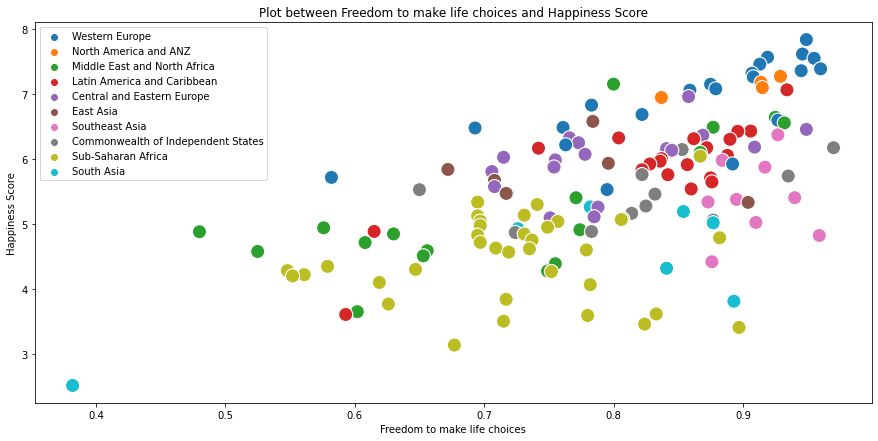

In [20]:
plt.rcParams['figure.figsize']=(15,7)
plt.title("Plot between Freedom to make life choices and Happiness Score")
sbn.scatterplot(x=df['freedom'],y=df['hap_score'],hue=df['regional_indicator'],s=200)
plt.legend(loc="upper left",fontsize="10")
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.show()

1 - The people in Western Europe and North America have the privelege to take life decisions and hence as they have freedom the people in these regions are one of the happiest people in the world

2 - The people in Middle East, African Sub continent dont have privelege to take the life decisions and so the people are not so happy here.

## Lets see what is the effect on Happiness Score by Social Support

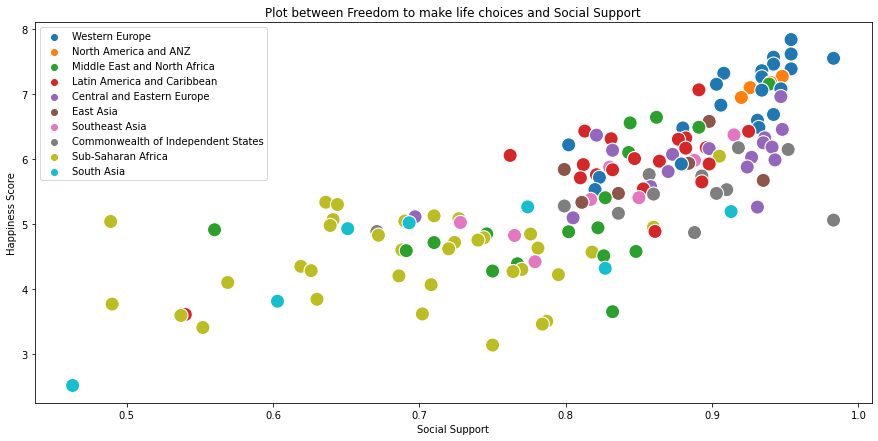

In [21]:
plt.rcParams['figure.figsize']=(15,7)
plt.title("Plot between Freedom to make life choices and Social Support")
sbn.scatterplot(x=df['social_support'],y=df['hap_score'],hue=df['regional_indicator'],s=200)
plt.legend(loc="upper left",fontsize="10")
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

1 - The people in Western Europe and North America have more social support and hence as they have more social support the people in these regions are one of the happiest people in the world

2 - The people in Middle East, African Sub continent dont have social support and so the people are not so happy here.

## Top 10 Least corrupt Countries

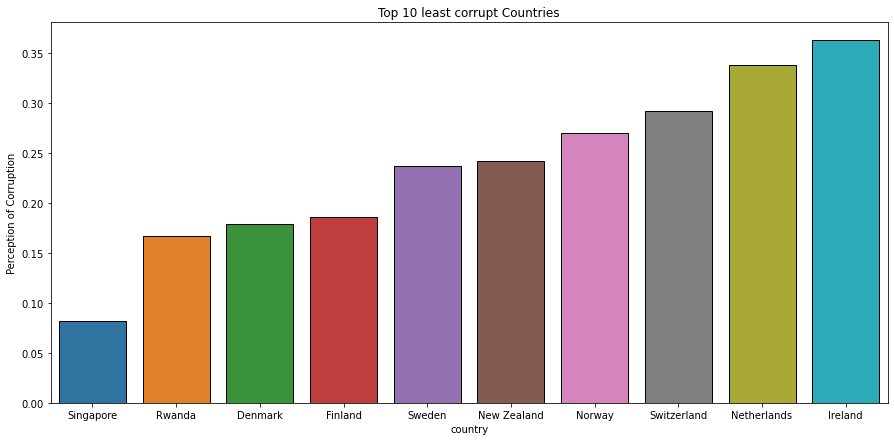

In [22]:
cor_less = df.sort_values(by='Perceptions_of_corruption').head(10)
sbn.barplot(y=cor_less['Perceptions_of_corruption'],x=cor_less['country_name'],edgecolor='black')
plt.xlabel('country')
plt.ylabel('Perception of Corruption')
plt.title('Top 10 least corrupt Countries')
plt.show()

## Top 10 Most Corrupt Countries

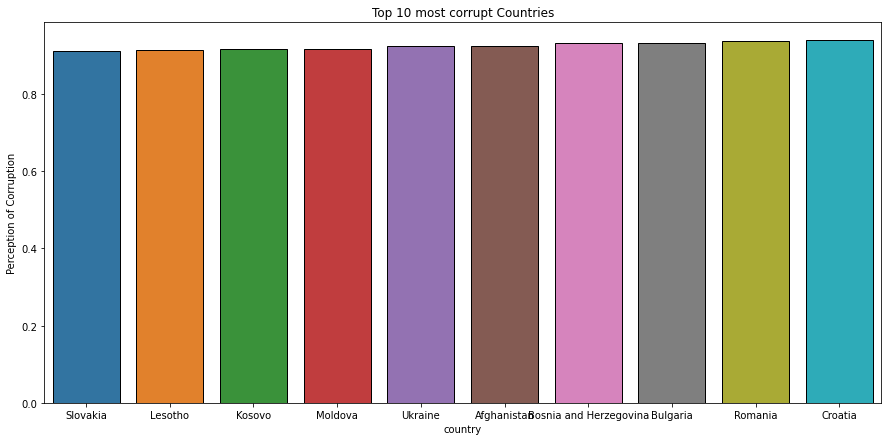

In [23]:
cor_less = df.sort_values(by='Perceptions_of_corruption').tail(10)
sbn.barplot(y=cor_less['Perceptions_of_corruption'],x=cor_less['country_name'],edgecolor='black')
plt.xlabel('country')
plt.ylabel('Perception of Corruption')
plt.title('Top 10 most corrupt Countries')
plt.show()

1 - Singapore , Rwanda and set of European Countries are the least corrupted countries.

2 - The balkan countries followed by African countries are said to be Most Corrupt countries in the world!

## Genrosity VS Happiness Score

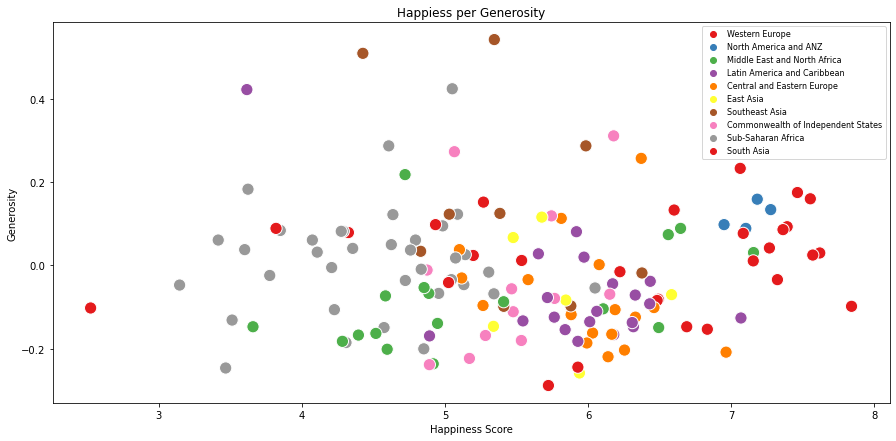

In [24]:
sbn.scatterplot(x=df.hap_score,y=df.Generosity,hue=df.regional_indicator,palette=('Set1'),s=150)
plt.legend(loc='upper right',fontsize=8)
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.title('Happiess per Generosity')
plt.show()

## Corruption vs Happiness score

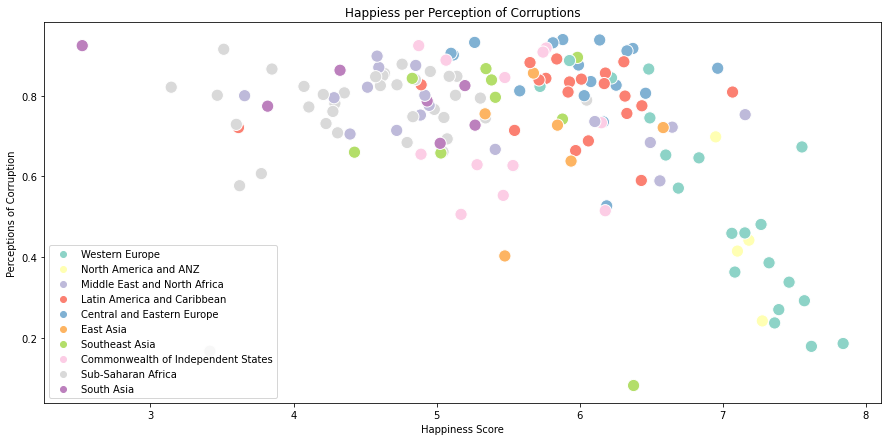

In [25]:
sbn.scatterplot(x=df.hap_score,y=df.Perceptions_of_corruption,hue=df.regional_indicator,palette=('Set3'),s=150)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('Perceptions of Corruption')
plt.title('Happiess per Perception of Corruptions')
plt.show()

### As Easy as it could be :- 
#### Less Corruption = More Happiness
#### More Corruption = Less Happiness

# So in general we can say that the countries which have high GDP per Capita , Freedom , Social Support have High Happiness Score which directly Contributes to high Life Expectancy.So the European Countries have higher Life Expectancy because of Happiness Score as Compared to Other Countries in the world!